In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import json
import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("../data/raw/new_movies_full.csv")
df.head()

adult                     backdrop_path  \
0  False  /nKyBbFSooRPTJVqjrDteD1lF733.jpg   
1  False  /sItIskd5xpiE64bBWYwZintkGf3.jpg   
2  False  /g62G6aBcAcJv3ClCKmJgmHarHvq.jpg   
3  False  /962KXsr09uK8wrmUg9TjzmE7c4e.jpg   
4  False  /qtSY2SAL5QApuCUD0sXqyzgHYnl.jpg   

                               belongs_to_collection       budget  \
0  {'id': 8580, 'name': 'The Karate Kid Collectio...   45000000.0   
1  {'id': 1494663, 'name': 'Ballerina Collection'...   90000000.0   
2                                                NaN  225000000.0   
3  {'id': 1119879, 'name': 'Ice Road Collection',...          NaN   
4                                                NaN          NaN   

                                              genres  \
0  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   
1  [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...   
2  [{'id': 878, 'name': 'Science Fiction'}, {'id'...   
3  [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...   
4  [{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...   

                                 homepage       id     imdb_id origin_country  \
0                 https://karatekid.movie  1011477   tt1674782         ['US']   
1   https://johnwick.movie/film/ballerina   541671   tt7181546         ['US']   
2                https://www.superman.com  1061474   tt5950044         ['US']   
3                                     NaN  1119878  tt27621210   ['NP', 'US']   
4  https://www.netflix.com/title/81661402  1374534  tt27675583         ['NL']   

  original_language  ... runtime  \
0                en  ...      94   
1                en  ...     125   
2                en  ...     130   
3                en  ...     113   
4                nl  ...      95   

                                    spoken_languages    status  \
0  [{'english_name': 'English', 'iso_639_1': 'en'...  Released   
1  [{'english_name': 'English', 'iso_639_1': 'en'...  Released   
2  [{'english_name': 'English', 'iso_639_1': 'en'...  Released   
3  [{'english_name': 'English', 'iso_639_1': 'en'...  Released   
4  [{'english_name': 'Dutch', 'iso_639_1': 'nl', ...  Released   

                                   tagline                title  video  \
0  When masters unite a new legacy begins.  Karate Kid: Legends  False   
1                Vengeance has a new face.            Ballerina  False   
2                                 Look up.             Superman  False   
3                                      NaN  Ice Road: Vengeance  False   
4                                      NaN          Almost Cops  False   

  vote_average  vote_count                                            credits  \
0        7.281         367  {'cast': [{'adult': False, 'gender': 2, 'id': ...   
1        7.453         944  {'cast': [{'adult': False, 'gender': 1, 'id': ...   
2        7.470         538  {'cast': [{'adult': False, 'gender': 2, 'id': ...   
3        7.015          97  {'cast': [{'adult': False, 'gender': 2, 'id': ...   
4        5.089          29  {'cast': [{'adult': False, 'gender': 2, 'id': ...   

                                            keywords  
0  {'keywords': [{'id': 242, 'name': 'new york ci...  
1  {'keywords': [{'id': 782, 'name': 'assassin'},...  
2  {'keywords': [{'id': 1701, 'name': 'hero'}, {'...  
3  {'keywords': [{'id': 3070, 'name': 'mercenary'...  
4  {'keywords': [{'id': 703, 'name': 'detective'}...  

[5 rows x 28 columns]

In [161]:
df["poster_path"] = df["poster_path"].apply(
    lambda x: "https://image.tmdb.org/t/p/original" + str(x)
)

In [162]:
df["poster_path"][
    df["poster_path"] == "https://image.tmdb.org/t/p/originalnan"
] = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRoWcWg0E8pSjBNi0TtiZsqu8uD2PAr_K11DA&s"

In [163]:
df["poster_path"].values[0]

'https://image.tmdb.org/t/p/originalhttps://image.tmdb.org/t/p/original/AEgggzRr1vZCLY86MAp93li43z.jpg'

In [164]:
df.drop(
    columns=["backdrop_path", "homepage", "belongs_to_collection", "imdb_id"],
    inplace=True,
)

In [165]:
df.loc[df["budget"] == 0, "budget"] = np.nan
df.isnull().mean()[df.isnull().mean() > 0]

budget          0.450190
overview        0.007602
release_date    0.002200
tagline         0.273355
dtype: float64

In [166]:
df.drop_duplicates(inplace=True)

In [167]:
df["tagline"].fillna("", inplace=True)
df["overview"].fillna("", inplace=True)
df.dropna(subset=["runtime", "release_date"], inplace=True)

In [168]:
df.isnull().mean()[df.isnull().mean() > 0]

budget    0.448854
dtype: float64

In [169]:
from sklearn.impute import SimpleImputer

si = SimpleImputer(strategy="mean")
si.fit(df["budget"].values.reshape(-1, 1))
df["budget"] = si.transform(df["budget"].values.reshape(-1, 1)).ravel()

In [170]:
df.isnull().mean()[df.isnull().mean() > 0]

Series([], dtype: float64)

In [171]:
import ast

In [172]:
df["cast"] = df["credits"].apply(lambda x: ast.literal_eval(x)["cast"])
df["crew"] = df["credits"].apply(lambda x: ast.literal_eval(x)["crew"])

In [173]:
df["box-off"] = df["revenue"] - df["budget"]
df["hit/flop"] = df["box-off"].apply(lambda x: "hit" if x >= 0 else "flop")

In [174]:
df["profit_per"] = df["box-off"] * 100 / df["budget"]

In [175]:
df.to_csv("../data/interim/new_movies_full.csv", index=False)

# EDA

In [ ]:
df.describe()

<Axes: >

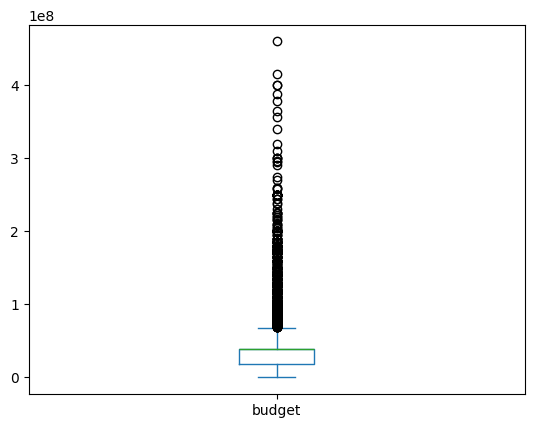

In [69]:
df["budget"].plot(kind="box")

<Axes: >

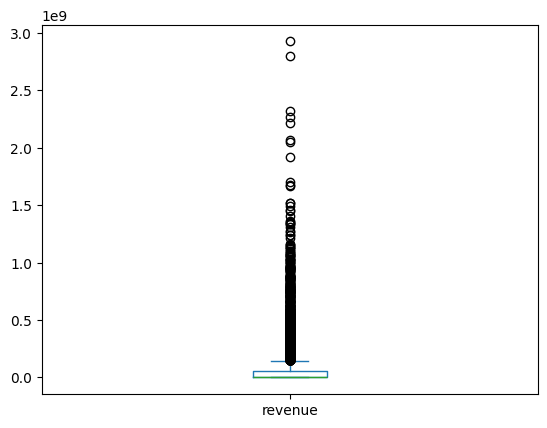

In [70]:
df["revenue"].plot(kind="box")

In [71]:
from scipy.stats.mstats import winsorize

# only for visualisation of profit per it changes less the 1 percentile values to value at 1st percentile and same with
# top 1 percentile
px.histogram(
    df,
    winsorize(df["profit_per"], limits=[0.01, 0.01]),
    color="hit/flop",
    title="Profit percentage values",
)

In [72]:
px.pie(
    names=df["original_language"].value_counts().index,
    values=df["original_language"].value_counts().values,
).update_traces(textposition="inside")

In [73]:
px.histogram(df, x="box-off", nbins=100, text_auto=True, color="hit/flop")

In [74]:
px.pie(
    names=df["hit/flop"].value_counts().index,
    values=df["hit/flop"].value_counts().values,
).update_traces(textposition="inside")

In [75]:
px.histogram(df, x="budget", nbins=50, text_auto=True, color="hit/flop")

In [76]:
px.histogram(df, x="popularity", text_auto=True, color="hit/flop", nbins=50)

In [77]:
df["release_date"] = pd.to_datetime(df["release_date"])
df["release_year"] = df["release_date"].dt.year
df["release_day"] = df["release_date"].dt.day_name()
df["release_month"] = df["release_date"].dt.month_name()

In [78]:
px.histogram(df, x="release_year", text_auto=True, color="hit/flop", nbins=50)

In [79]:
px.histogram(x=df["release_day"], text_auto=True, color=df["hit/flop"], nbins=50)

In [80]:
px.histogram(x=df["release_month"], text_auto=True, color=df["hit/flop"], nbins=50)

In [81]:
px.histogram(x=df["runtime"], text_auto=True, color=df["hit/flop"], nbins=25)

In [82]:
px.pie(
    names=df["status"].value_counts().index, values=df["status"].value_counts().values
).update_traces(textposition="inside")

In [83]:
px.histogram(x=df["vote_average"], text_auto=True, color=df["hit/flop"], nbins=11)

In [84]:
px.histogram(x=df["vote_count"], text_auto=True, color=df["hit/flop"], nbins=50)

# Multivariate analysis

In [85]:
px.scatter(df, x="budget", y="revenue", color="hit/flop", hover_name="original_title")

In [86]:
px.scatter(
    df, x="popularity", y="revenue", color="hit/flop", hover_name="original_title"
)

In [87]:
px.scatter(
    df, x="vote_count", y="vote_average", color="hit/flop", hover_name="original_title"
)

In [88]:
px.scatter(
    df, x="release_year", y="vote_count", color="hit/flop", hover_name="original_title"
)

In [89]:
px.scatter(
    df,
    x="release_year",
    y="vote_average",
    color="hit/flop",
    hover_name="original_title",
)

<Axes: >

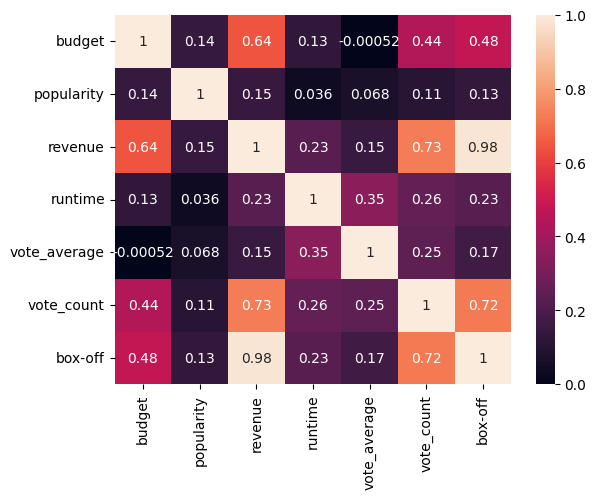

In [90]:
sns.heatmap(
    df[
        [
            "budget",
            "popularity",
            "revenue",
            "runtime",
            "vote_average",
            "vote_count",
            "box-off",
        ]
    ].corr(),
    annot=True,
)

In [91]:
def grouped_bar_ch(values_A, values_B, groups, tle="", v1="hit", v2="flop"):
    fig = go.Figure()

    fig.add_trace(go.Bar(x=groups, y=values_A, name=v1, marker_color="blue"))

    fig.add_trace(go.Bar(x=groups, y=values_B, name=v2, marker_color="orange"))

    # Group bars side-by-side
    fig.update_layout(
        barmode="group",
        title=tle,
        xaxis_title="",
        yaxis_title="",
        xaxis=dict(categoryorder="array", categoryarray=groups),
    )

    fig.show()

In [92]:
def genre(txt):
    txt = ast.literal_eval(txt)
    ans = []
    for i in txt:
        ans.append(i["name"])
    return ans

In [111]:
def cast(txt):
    ans = []
    for i in txt:
        ans.append(i["name"])
    return ans

In [ ]:
def keywords(txt):
    k = ast.literal_eval(txt)
    ans = []
    for i in k["keywords"]:
        ans.append(i["name"])
    return ans

In [94]:
def draw_graph(lst):
    revenues_hit = []
    revenues_flop = []
    count_hit = []
    count_flop = []
    budget_hit = []
    budget_flop = []
    total_rev = []
    total_bug = []
    for comp in lst:
        total_rev.append(df[df[comp] == 1]["revenue"].sum())
        total_bug.append(df[df[comp] == 1]["budget"].sum())
        revenues_hit.append(
            df[(df[comp] == 1) & (df["hit/flop"] == "hit")]["revenue"].sum()
        )
        revenues_flop.append(
            df[(df[comp] == 1) & (df["hit/flop"] == "flop")]["revenue"].sum()
        )
        budget_hit.append(
            df[(df[comp] == 1) & (df["hit/flop"] == "hit")]["budget"].sum()
        )
        budget_flop.append(
            df[(df[comp] == 1) & (df["hit/flop"] == "flop")]["budget"].sum()
        )
        count_hit.append(df[(df[comp] == 1) & (df["hit/flop"] == "hit")].shape[0])
        count_flop.append(df[(df[comp] == 1) & (df["hit/flop"] == "flop")].shape[0])
    grouped_bar_ch(revenues_hit, revenues_flop, lst, "revenue comparison")
    grouped_bar_ch(count_hit, count_flop, lst, "total no of movies")
    grouped_bar_ch(budget_hit, budget_flop, lst, "budget of all movies")
    grouped_bar_ch(total_rev, total_bug, lst, "revenue and budget", "reveue", "budget")

In [95]:
from tqdm import tqdm

In [96]:
top_dict = {}

In [103]:
def seprate(col_name, n=20, func=genre):
    df[col_name] = df[col_name].apply(func)
    dct = {}
    for i in df[col_name].values:
        for j in i:
            dct[j] = dct.get(j, 0) + 1
    sorted_comp = sorted(dct, key=lambda a: 1 / dct[a])[:n]
    top_dict[col_name] = sorted_comp
    for i in tqdm(sorted_comp):
        df[i] = df[col_name].apply(lambda x: 1 if i in x else 0)
    draw_graph(sorted_comp)
    df.drop(columns=[col_name], axis=1, inplace=True)

In [99]:
df_backup = df.copy()

In [100]:
seprate("genres")

100%|██████████| 19/19 [00:00<00:00, 143.24it/s]


In [104]:
seprate("keywords", 50, keywords)

100%|██████████| 50/50 [00:00<00:00, 127.91it/s]


In [105]:
seprate("production_companies", 50)

100%|██████████| 50/50 [00:00<00:00, 184.65it/s]


In [106]:
seprate("production_countries", 50)

100%|██████████| 50/50 [00:00<00:00, 241.26it/s]


In [107]:
seprate("spoken_languages", 20)

100%|██████████| 20/20 [00:00<00:00, 234.31it/s]


In [112]:
seprate("cast", 50, cast)

100%|██████████| 50/50 [00:01<00:00, 42.61it/s]


In [113]:
seprate("crew", 50, cast)

100%|██████████| 50/50 [00:02<00:00, 22.12it/s]


In [114]:
with open("../data/interim/top_dict.json", "w") as f:
    json.dump(top_dict, f)